In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import numpy as np
import matplotlib as mp
import seaborn as sb

url = 'https://raw.githubusercontent.com/Vinnicius-Stein/Data-Science-and-AI/master/Orange%20Production/Dataset/FAOSTAT_data_11-13-2020.csv'
df = pd.read_csv(url)

df.head()

,Domain,Area,Element,Item,Year,Value
0,Value of Agricultural Production,Afghanistan,Gross Production Value (constant 2014-2016 100...,Oranges,1961,3295.181600
1,Value of Agricultural Production,Afghanistan,Gross Production Value (constant 2014-2016 100...,Oranges,1962,3295.181600
2,Value of Agricultural Production,Afghanistan,Gross Production Value (constant 2014-2016 100...,Oranges,1963,3295.181600
3,Value of Agricultural Production,Afghanistan,Gross Production Value (constant 2014-2016 100...,Oranges,1964,4045.569490
4,Value of Agricultural Production,Afghanistan,Gross Production Value (constant 2014-2016 100...,Oranges,1965,4469.701775


In [2]:
df.tail()

,Domain,Area,Element,Item,Year,Value
6472,Value of Agricultural Production,Zimbabwe,Gross Production Value (constant 2014-2016 100...,Oranges,2014,31766.483229
6473,Value of Agricultural Production,Zimbabwe,Gross Production Value (constant 2014-2016 100...,Oranges,2015,31474.835635
6474,Value of Agricultural Production,Zimbabwe,Gross Production Value (constant 2014-2016 100...,Oranges,2016,31364.571174
6475,Value of Agricultural Production,Zimbabwe,Gross Production Value (constant 2014-2016 100...,Oranges,2017,31473.800074
6476,Value of Agricultural Production,Zimbabwe,Gross Production Value (constant 2014-2016 100...,Oranges,2018,31583.028974


In [3]:
headers = ["Domain", "Country-Area", "Production", "Product", "Year", "Price"]
df.columns = headers
df.head()

,Domain,Country-Area,Production,Product,Year,Price
0,Value of Agricultural Production,Afghanistan,Gross Production Value (constant 2014-2016 100...,Oranges,1961,3295.181600
1,Value of Agricultural Production,Afghanistan,Gross Production Value (constant 2014-2016 100...,Oranges,1962,3295.181600
2,Value of Agricultural Production,Afghanistan,Gross Production Value (constant 2014-2016 100...,Oranges,1963,3295.181600
3,Value of Agricultural Production,Afghanistan,Gross Production Value (constant 2014-2016 100...,Oranges,1964,4045.569490
4,Value of Agricultural Production,Afghanistan,Gross Production Value (constant 2014-2016 100...,Oranges,1965,4469.701775


Observação sobre o campo 'Production': O valor da produção em termos constantes é obtido usando os preços médios de um ano ou anos selecionados, conhecidos como período base. As séries de preços constantes podem ser usadas para mostrar como a quantidade ou o volume dos produtos mudou e são frequentemente chamadas de medidas de volume

In [4]:
# verificando se há valores faltantes
df.replace("?", np.nan, inplace = True)
no_data = df.isna()
for column in no_data.columns.values.tolist():
    print(column)
    print (no_data[column].value_counts())
    print("")   

Domain
False    6477
Name: Domain, dtype: int64

Country-Area
False    6477
Name: Country-Area, dtype: int64

Production
False    6477
Name: Production, dtype: int64

Product
False    6477
Name: Product, dtype: int64

Year
False    6477
Name: Year, dtype: int64

Price
False    6477
Name: Price, dtype: int64



In [5]:
# verificando se há valores nulos
df.replace("?", np.nan, inplace = True)
no_data = df.isnull()
for column in no_data.columns.values.tolist():
    print(column)
    print (no_data[column].value_counts())
    print("")

Domain
False    6477
Name: Domain, dtype: int64

Country-Area
False    6477
Name: Country-Area, dtype: int64

Production
False    6477
Name: Production, dtype: int64

Product
False    6477
Name: Product, dtype: int64

Year
False    6477
Name: Year, dtype: int64

Price
False    6477
Name: Price, dtype: int64



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6477 entries, 0 to 6476
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Domain        6477 non-null   object 
 1   Country-Area  6477 non-null   object 
 2   Production    6477 non-null   object 
 3   Product       6477 non-null   object 
 4   Year          6477 non-null   int64  
 5   Price         6477 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 303.7+ KB


In [7]:
#Utilizando dataframe necessário para análise
enhanced_df = df[['Country-Area', 'Year', 'Price']]
enhanced_df.head()

,Country-Area,Year,Price
0,Afghanistan,1961,3295.181600
1,Afghanistan,1962,3295.181600
2,Afghanistan,1963,3295.181600
3,Afghanistan,1964,4045.569490
4,Afghanistan,1965,4469.701775


In [8]:
# Transpondo a base para visualizar por ano para uma melhor visualização dos valores
enhanced_df_pivot = enhanced_df.pivot(index='Country-Area', columns='Year', values='Price')
enhanced_df_pivot

Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country-Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3295.181600,3295.181600,3295.181600,4045.569490,4469.701775,4991.710741,6035.728674,6100.979795,6166.230916,5970.477553,...,1305.022416,652.511208,1957.533624,1957.533624,2061.935417,2260.951336,1607.135105,1323.085665,1277.124055,1535.738820
Albania,832.930557,685.136768,672.412800,773.225781,652.511208,730.812553,835.214346,913.515691,1148.419726,1076.643493,...,1875.969723,2163.400910,2316.414788,2975.451108,3153.380959,1344.173088,2723.259195,3283.110143,2978.871572,3516.709156
Algeria,81890.156604,89987.820695,92004.080328,104705.210992,93223.623776,92007.342884,92094.453130,96553.388470,112677.919187,117578.604614,...,204265.697364,190042.584308,265813.490803,261825.668555,290587.383837,311641.375726,327912.656213,291269.258049,330807.195931,370037.238570
Argentina,169979.169684,169000.402872,161985.907386,172262.958912,137027.353680,200320.940856,208934.088802,222506.321928,267692.723082,282080.595218,...,293216.351494,271929.478356,368692.975435,304568.088980,280498.908050,333523.273835,326682.672586,336841.293327,334411.994100,328467.290740
Australia,58018.686571,58018.686571,66110.478061,62048.595791,76970.874607,64902.353559,75839.746428,69939.413829,86080.909837,76457.022031,...,113446.903645,127677.846836,95013.135764,127174.108184,130682.987205,114189.461400,110155.637112,130048.746310,108421.588577,123400.635868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,11418.946140,13050.224160,15334.013388,16639.035804,18270.313824,19575.336240,20880.358656,21532.869864,22837.892280,24469.170300,...,226258.261374,237970.837558,173350.760347,169928.893695,173554.148090,192337.466226,184698.321761,207798.514669,250668.265322,278193.176497
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36704.407961,39386.229026,39149.693713,39229.300081,39181.340507,39219.838668,36082.238524,34953.394135,34915.548484,35849.994995
Yugoslav SFR,294.282555,172.262959,58.073498,151.708856,231.641479,269.813385,300.155156,221.853811,283.842375,371.278877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos obter um total da produção bruta de 1961 à 2018 para cada região-país e classificá-los por esse total, em seguida, trocar o índice e as colunas para preparar para o gráfico.

In [9]:
enhanced_df_pivot.columns = enhanced_df_pivot.columns.astype(str)
years = list(map(str, range(1961, 2019)))
gap = enhanced_df_pivot
gap['Total'] = gap.sum(axis=1)
gap.sort_values(['Total'], ascending=False, axis=0, inplace=True)
gap = gap[years].transpose()
gap.fillna(0, inplace=True)
gap.head()

Country-Area,Brazil,United States of America,Mexico,India,Spain,China,"China, mainland",Italy,Egypt,Iran (Islamic Republic of),...,Burkina Faso,Brunei Darussalam,French Polynesia,Croatia,Kuwait,Guam,Bosnia and Herzegovina,Russian Federation,Seychelles,Djibouti
Year,,,,,,,,,,,,,,,,,,,,,
1961,574786.682948,1.495376e+06,251993.955929,245344.214208,556004.800337,14227.028124,13376.479764,260743.478717,51222.129828,16639.035804,...,0.0,130.502242,65.251121,0.0,1.957534,0.0,0.0,0.0,2.610045,0.0
1962,603866.497444,1.787946e+06,287928.400664,218591.254680,395780.673212,17097.098672,15986.524596,232359.241169,91351.569120,17944.058220,...,0.0,130.502242,65.251121,0.0,2.283789,0.0,0.0,0.0,2.610045,0.0
1963,687247.642158,1.328023e+06,278897.645546,218591.254680,592349.674622,15325.530742,13702.735368,300872.918009,109948.138548,18922.825032,...,0.0,146.815022,65.251121,0.0,3.262556,0.0,0.0,0.0,2.936300,0.0
1964,670442.215996,1.155770e+06,275786.472106,225442.622364,529056.087446,20608.587738,18922.825032,332650.213838,107338.093716,20227.847448,...,0.0,146.815022,65.251121,0.0,3.262556,0.0,0.0,0.0,3.262556,0.0
1965,745665.013076,1.533039e+06,457007.431137,254479.371120,573002.717305,21789.633024,19901.591844,325439.964990,110926.905360,21532.869864,...,0.0,146.815022,65.251121,0.0,3.262556,0.0,0.0,0.0,0.000000,0.0


In [10]:
gap_top10 = gap.transpose()
gap_top10 = gap_top10.head(10)
gap_top10_pivot = gap_top10.transpose()
gap_top10_pivot.head()

Country-Area,Brazil,United States of America,Mexico,India,Spain,China,"China, mainland",Italy,Egypt,Iran (Islamic Republic of)
Year,,,,,,,,,,
1961,574786.682948,1.495376e+06,251993.955929,245344.214208,556004.800337,14227.028124,13376.479764,260743.478717,51222.129828,16639.035804
1962,603866.497444,1.787946e+06,287928.400664,218591.254680,395780.673212,17097.098672,15986.524596,232359.241169,91351.569120,17944.058220
1963,687247.642158,1.328023e+06,278897.645546,218591.254680,592349.674622,15325.530742,13702.735368,300872.918009,109948.138548,18922.825032
1964,670442.215996,1.155770e+06,275786.472106,225442.622364,529056.087446,20608.587738,18922.825032,332650.213838,107338.093716,20227.847448
1965,745665.013076,1.533039e+06,457007.431137,254479.371120,573002.717305,21789.633024,19901.591844,325439.964990,110926.905360,21532.869864


Vamos dar uma visualizada em um gráfico de área. Podemos observar que o Brasil ultrapassa a produção dos EUA em aproximadamente 1978 e desde então, lidera.

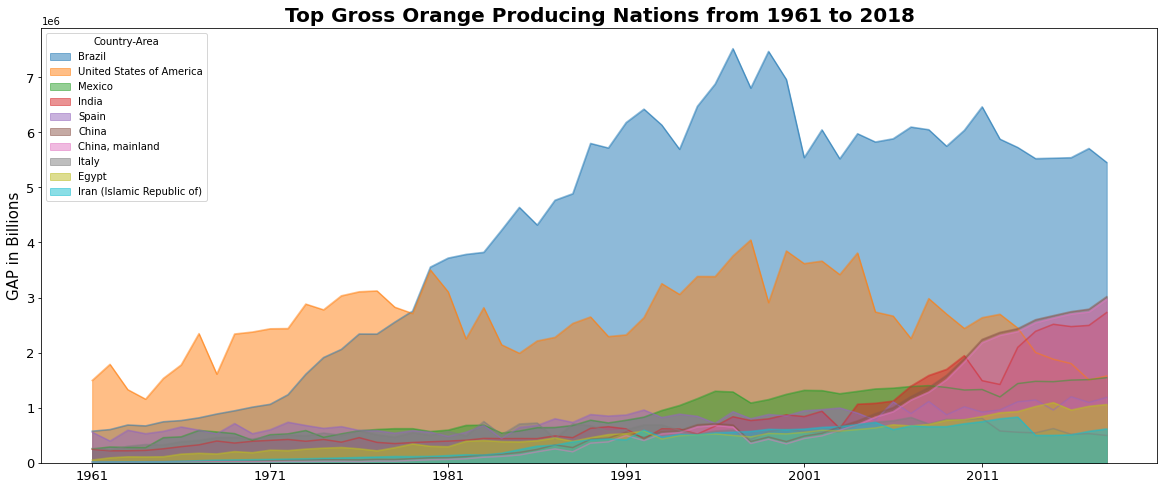

In [11]:
gap_top10_pivot.fillna(0, inplace=True)
ax = gap_top10_pivot.plot(kind='area', figsize=(20,8), stacked=False)
ax.set_title('Top Gross Orange Producing Nations from 1961 to 2018', fontsize=20, fontweight='bold')
ax.set_ylabel('GAP in Billions', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)

Em boxplot temos uma melhor visualização dos quartis, medianas, outliers e amplitude.

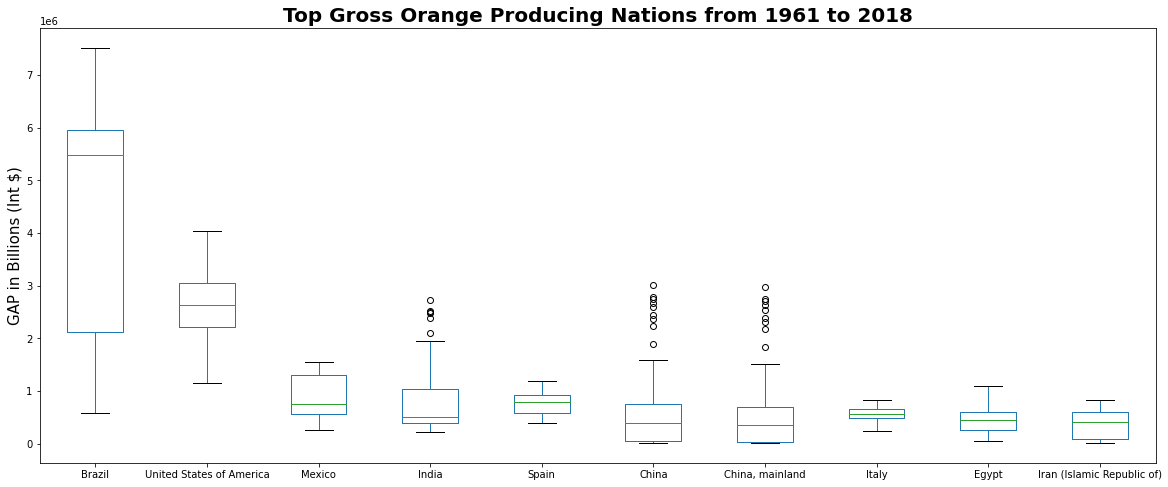

In [12]:
ax0 = gap_top10_pivot.plot(kind='box', figsize=(20,8))
ax0.set_title('Top Gross Orange Producing Nations from 1961 to 2018', fontsize=20, fontweight='bold')
ax0.set_ylabel('GAP in Billions (Int $)', fontsize=15)
ax0.tick_params(labelsize=10)

Data Source: http://www.fao.org/faostat/en/#data/QV